                                     Id                     START  \
0  32c84703-2481-49cd-d571-3899d5820253 2011-01-02 09:26:36+00:00   
1  c98059da-320a-c0a6-fced-c8815f3e3f39 2011-01-03 05:44:39+00:00   
2  4ad28a3a-2479-782b-f29c-d5b3f41a001e 2011-01-03 14:32:11+00:00   
3  c3f4da61-e4b4-21d5-587a-fbc89943bc19 2011-01-03 16:24:45+00:00   
4  a9183b4f-2572-72ea-54c2-b3cd038b4be7 2011-01-03 17:36:53+00:00   

                       STOP                               PATIENT  \
0 2011-01-02 12:58:36+00:00  3de74169-7f67-9304-91d4-757e0f3a14d2   
1 2011-01-03 06:01:42+00:00  d9ec2e44-32e9-9148-179a-1653348cc4e2   
2 2011-01-03 14:47:11+00:00  73babadf-5b2b-fee7-189e-6f41ff213e01   
3 2011-01-03 16:39:45+00:00  3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b   
4 2011-01-03 17:51:53+00:00  fa006887-d93c-d302-8b89-f3c25f88c0e1   

                           ORGANIZATION                                 PAYER  \
0  d78e84ec-30aa-3bba-a33a-f29a3a454662  b1c428d6-4f07-31e0-90f0-68ffa6ff8c76   
1  d78e8

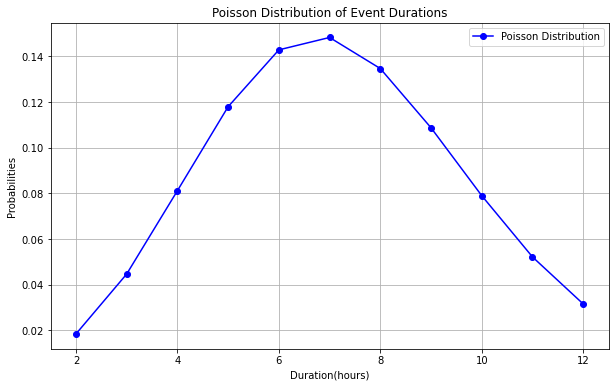

In [3]:
# Patient average hospital visit duration +/- hours using Poisson Distribution
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt

df = pd.read_csv(r'hospital_visits.csv')

df['START'] = pd.to_datetime(df['START'])
df['STOP'] = pd.to_datetime(df['STOP'])

# Calculate the time difference in hours
df['DURATION'] =(df['STOP'] - df['START']).dt.total_seconds() / 3600
print(df.head())

# Compute average events per time unit(here, hours)
avg_duration = df['DURATION'].mean()
print(f"Average Duration : {avg_duration} hours")

# Define range for poisson distribution (eg, around the averagw)
# Will have start and end of the range as two values
k = range(int(avg_duration) -5, int(avg_duration) + 6)  # +/- hours from the average

probabilities = poisson.pmf(k, avg_duration)

# Print Probabilities
print("Poisson probabilities for each k : ")
for duration, prob in zip(k, probabilities):
    print(f"{duration} hours: {prob}")

# Plot Poisson Distribution
plt.figure(figsize=(10,6))
plt.plot(k, probabilities, label= "Poisson Distribution", marker='o', color='blue')
plt.xlabel('Duration(hours)')
plt.ylabel('Probabilities')
plt.title('Poisson Distribution of Event Durations')
plt.legend()
plt.grid(True)
plt.show()